# Задача 6. Обучение без учителя

* **Дедлайн**: 14.03.2025, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [x] Найти данные с количеством признаков хотя бы 50, на которых можно решить задачу кластеризации.
- [x] Выполнить разведочный анализ (**EDA**). При необходимости выполнить полезные преобразования данных.
- [x] Самостоятельно реализуйте один из алгоритмов кластеризации, например **K-means**.
- [x] Обучите модели кластеризации, используя свою реализацию, а также хотя бы две реализации из **sklearn** (**KMeans**, **Affinity Propogation**, **DBSCAN** и тд).
- [x] При обучении использовать **подбор гиперпараметров**.
- [x] Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества.
- [x] * (**+3 балла**) Также снизить размерность данных с помощью метода главных компонент **PCA** и понять качество дальнейшей кластеризации всеми использованными реализациями при различном количестве главных компонент.
- [x] * (**+2 балла**) Визуализировать данные снижением размерности до 2 или 3 с помощью **PCA** и **t-SNE**. В случае проблем с производительностью **t-SNE**, можно сначала до какой то степени снизить размерность с помощью **PCA**, а затем запустить **t-SNE**.

**Выполнил**: Азим Мурадов

**Университет**: СПбГУ

**Группа**: 22.Б11-мм

В качестве датасета будет использован **HAR** датасет. База данных Human Activity Recognition (HAR) построена на записях 30 участников, выполняющих повседневные действия (ADL, activities of daily living) с закреплённым на поясе смартфоном, оснащённым инерционными датчиками.

Эксперименты были проведены с участием 30 добровольцев в возрасте от 19 до 48 лет. Каждый участник выполнял шесть видов активности (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING), имея смартфон (Samsung Galaxy S II), закреплённый на поясе. С помощью встроенных акселерометра и гироскопа фиксировались трёхосевые линейные ускорения и угловые скорости с частотой 50 Гц.

**Источник**:

- Cсылка на датасет: https://archive.ics.uci.edu/dataset/72/multiple+features
- DOI: https://doi.org/10.24432/C54S4K

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

print("Loading HAR dataset...")
data = datasets.fetch_openml('HAR', version=1, as_frame=True)
df: pd.DataFrame = data.frame
df

Loading HAR dataset...


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V553,V554,V555,V556,V557,V558,V559,V560,V561,Class
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989303,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,2
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,2
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696664,0.363139,-0.655357,0.274479,0.181184,2
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,2


## Выполним разведочный анализ, сделаем полезные преобразования данных

In [2]:
print("Data types:")
df.dtypes

Data types:


V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
           ...   
V558      float64
V559      float64
V560      float64
V561      float64
Class    category
Length: 562, dtype: object

In [3]:
print("Has Missing Values? -", df.isnull().any(axis=1).any())
print("Basic statistics for numerical features:")
df.describe()

Has Missing Values? - False
Basic statistics for numerical features:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V552,V553,V554,V555,V556,V557,V558,V559,V560,V561
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616189,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262624,-0.024903,-0.121019,-0.992360,-0.976990,-0.979137,-0.993294,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841848,-0.124694,-0.287031,-0.493108,-0.389041,-0.817287,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087404,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149006,0.291490,0.536137,0.365996,-0.521503,0.250791,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
target_col = df.select_dtypes(include=['object', 'category']).columns[0]
print("Category feature:", target_col)

print("Class distribution:")
print(df[target_col].value_counts())

Category feature: Class
Class distribution:
Class
6    1944
5    1906
4    1777
1    1722
2    1544
3    1406
Name: count, dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=[target_col]))

y = df[target_col]

## Реализуем алгоритмов кластеризации K-means

In [6]:
class KMeansCustom:
    def __init__(self, n_clusters=8, max_iter=300, n_init=10, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.n_init = n_init
        self.random_state = random_state
        self.cluster_centers_ = None
        self.labels_ = None
        self.inertia_ = None

    def fit(self, X: np.ndarray):
        best_inertia = np.inf
        best_labels = None
        best_centers = None
        rng = np.random.RandomState(self.random_state)
        for _ in range(self.n_init):
            indices = rng.choice(X.shape[0], self.n_clusters, replace=False)
            centers = X[indices]
            for _ in range(self.max_iter):
                distances = np.linalg.norm(X[:, None, :] - centers[None, :, :], axis=2)
                labels = np.argmin(distances, axis=1)
                new_centers = np.array([
                    X[labels == j].mean(axis=0) if np.any(labels == j) else centers[j]
                    for j in range(self.n_clusters)
                ])
                if np.allclose(centers, new_centers):
                    break
                centers = new_centers
            inertia = np.sum((X - centers[labels]) ** 2)
            if inertia < best_inertia:
                best_inertia = inertia
                best_labels = labels
                best_centers = centers
        self.cluster_centers_ = best_centers
        self.labels_ = best_labels
        self.inertia_ = best_inertia
        return self


## Обучим модели K-means (собственная реализация), K-means (sklearn) и AffinityPropagation (sklearn), подберём гиперпараметры

### Подбор гиперпараметров для KMeans (собственная реализация)

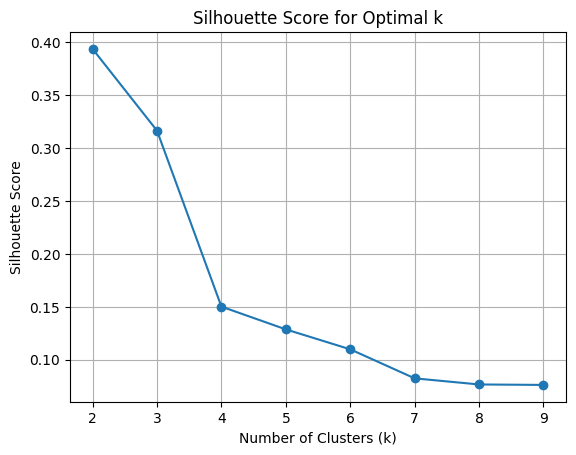

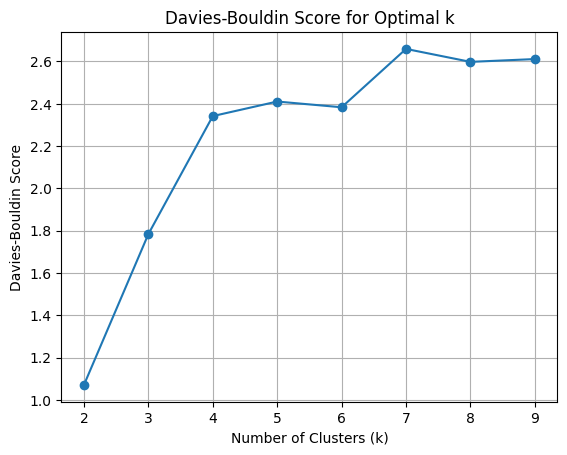

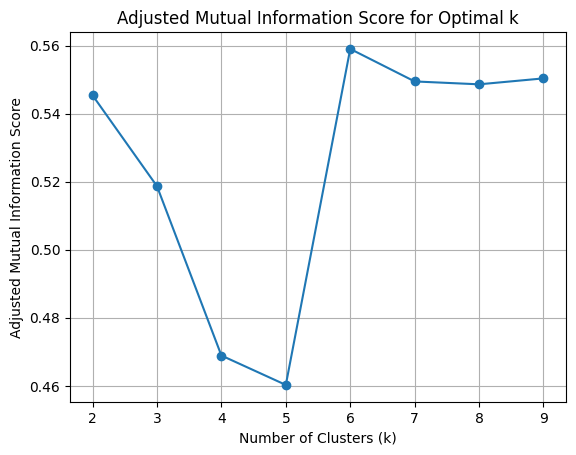

In [7]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_mutual_info_score


k_range = list(range(2, 10))

custom_kmeans_sil_scs = []
custom_kmeans_db_scs = []
custom_kmeans_ami_scs = []

for k in k_range:
    custom_kmeans = KMeansCustom(n_clusters=k, n_init=5, random_state=42)
    custom_kmeans.fit(X_scaled)
    labels = custom_kmeans.labels_

    custom_kmeans_sil_scs.append(silhouette_score(X_scaled, labels))
    custom_kmeans_db_scs.append(davies_bouldin_score(X_scaled, labels))
    custom_kmeans_ami_scs.append(adjusted_mutual_info_score(y.values, labels))


plt.plot(k_range, custom_kmeans_sil_scs, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

plt.plot(k_range, custom_kmeans_db_scs, marker='o')
plt.title('Davies-Bouldin Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True)
plt.show()

plt.plot(k_range, custom_kmeans_ami_scs, marker='o')
plt.title('Adjusted Mutual Information Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Adjusted Mutual Information Score')
plt.grid(True)
plt.show()

Наиболее подходящими являются k = 2, 3, 6. Выберем k = 3.

### Подбор гиперпараметров для KMeans (sklearn)

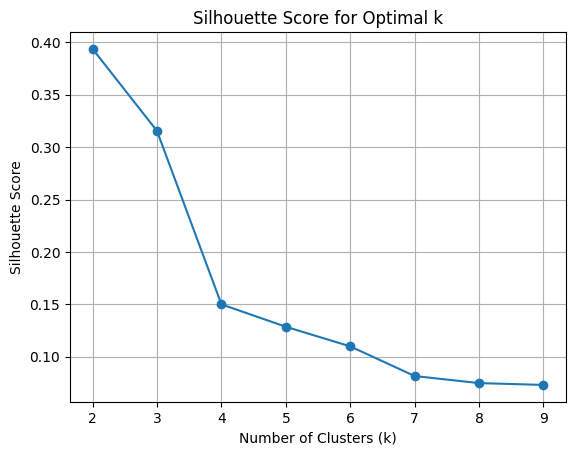

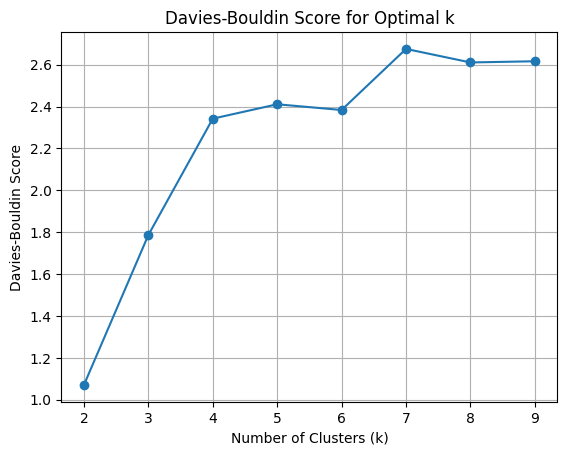

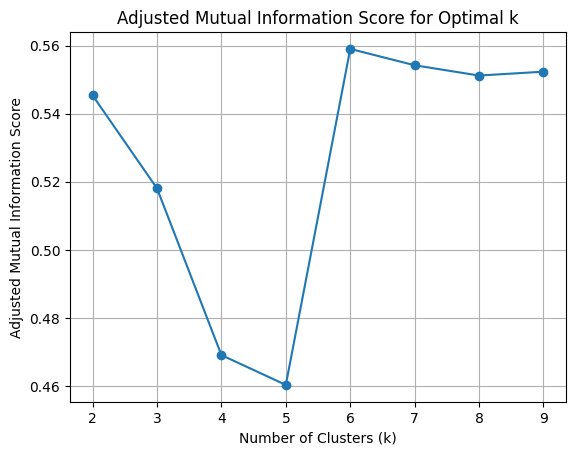

In [8]:
from sklearn.cluster import KMeans


k_range = list(range(2, 10))

kmeans_sil_scs = []
kmeans_db_scs = []
kmeans_ami_scs = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_

    kmeans_sil_scs.append(silhouette_score(X_scaled, labels))
    kmeans_db_scs.append(davies_bouldin_score(X_scaled, labels))
    kmeans_ami_scs.append(adjusted_mutual_info_score(y.values, labels))


plt.plot(k_range, kmeans_sil_scs, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

plt.plot(k_range, kmeans_db_scs, marker='o')
plt.title('Davies-Bouldin Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True)
plt.show()

plt.plot(k_range, kmeans_ami_scs, marker='o')
plt.title('Adjusted Mutual Information Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Adjusted Mutual Information Score')
plt.grid(True)
plt.show()

Наиболее подходящими являются k = 2, 3, 6. Выберем k = 3.

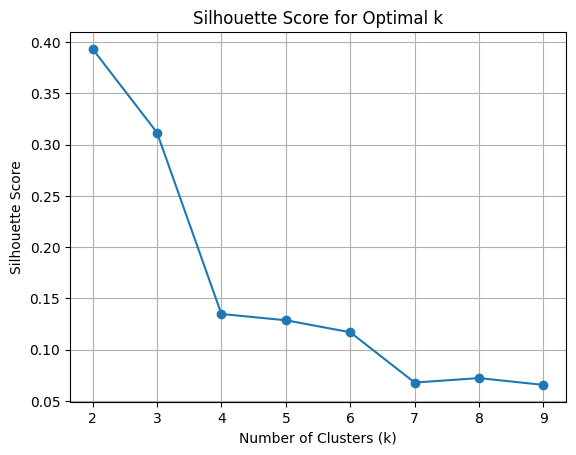

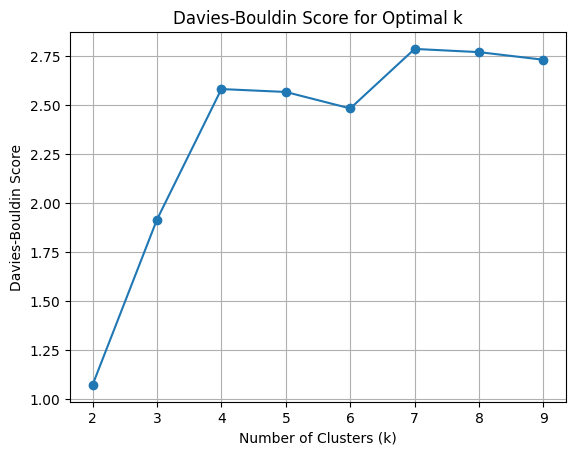

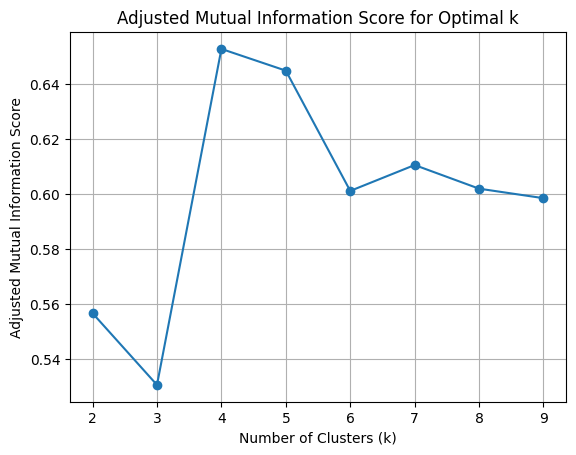

In [9]:
from sklearn.cluster import AgglomerativeClustering


k_range = list(range(2, 10))

ap_sil_scs = []
ap_db_scs = []
ap_ami_scs = []

for k in k_range:
    ap = AgglomerativeClustering(n_clusters=k)
    ap.fit(X_scaled)
    labels = ap.labels_

    ap_sil_scs.append(silhouette_score(X_scaled, labels))
    ap_db_scs.append(davies_bouldin_score(X_scaled, labels))
    ap_ami_scs.append(adjusted_mutual_info_score(y.values, labels))


plt.plot(k_range, ap_sil_scs, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

plt.plot(k_range, ap_db_scs, marker='o')
plt.title('Davies-Bouldin Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True)
plt.show()

plt.plot(k_range, ap_ami_scs, marker='o')
plt.title('Adjusted Mutual Information Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Adjusted Mutual Information Score')
plt.grid(True)
plt.show()

Наиболее подходящими являются k = 2, 3, 4, 5. Выберем k = 3.

## Сравнение качества моделей: замер скорости обучения, вычисление различных метрик качества

In [10]:
import time


def gen_models():
    return [
        (KMeansCustom(n_clusters=3, n_init=5, random_state=42), 'KMeans (custom)'),
        (KMeans(n_clusters=3, n_init=10, random_state=42), 'KMeans (sklearn)'),
        (AgglomerativeClustering(n_clusters=3), 'AgglomerativeClustering (sklearn)'),
    ]

for model, title in gen_models():
    start = time.time()
    model.fit(X_scaled)
    labels = model.labels_
    elapsed = time.time() - start

    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    ami = adjusted_mutual_info_score(y.values, labels)
    print(f"{title}: silhouette={sil:.3f}, davies_bouldin={db:.3f}, adjusted_mutual_info={ami:.3f}, time={elapsed:.2f}s")

KMeans (custom): silhouette=0.317, davies_bouldin=1.784, adjusted_mutual_info=0.519, time=8.20s
KMeans (sklearn): silhouette=0.315, davies_bouldin=1.787, adjusted_mutual_info=0.518, time=2.60s
AgglomerativeClustering (sklearn): silhouette=0.312, davies_bouldin=1.915, adjusted_mutual_info=0.531, time=20.55s


В целом, метрики качества достаточно близки, но показатели времени отличаются кардинально.

Поэтому, **лучше всего подходит модель K-means из sklearn**.

## Снижение размерности данных с помощью метода главных компонент **PCA**. Определение качества дальнейшей кластеризации при различном количестве главных компонент.

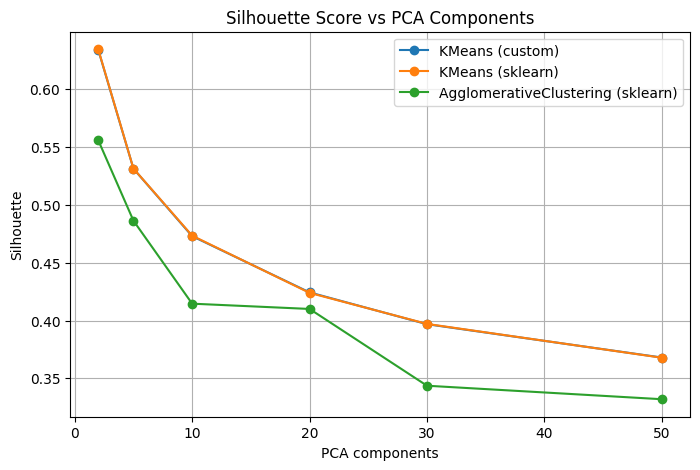

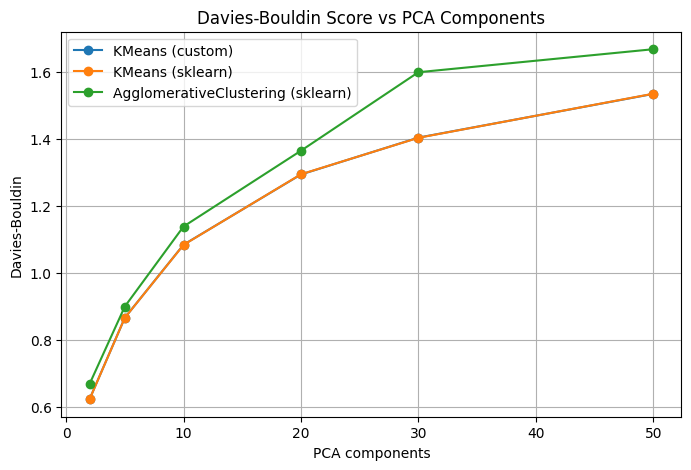

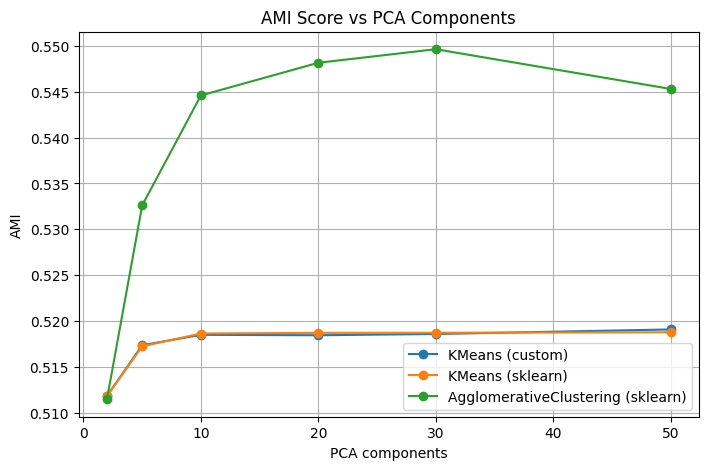

In [11]:
from sklearn.decomposition import PCA


pca_components = [50, 30, 20, 10, 5, 2]
metrics = {'Silhouette': [], 'Davies-Bouldin': [], 'AMI': []}
model_names = [title for _, title in gen_models()]

for n_comp in pca_components:
    sils, dbs, amis = [], [], []
    for model, title in gen_models():
        pca = PCA(n_components=n_comp, random_state=42)
        X_pca = pca.fit_transform(X_scaled)
        model.fit(X_pca)
        labels = model.labels_
        sils.append(silhouette_score(X_pca, labels))
        dbs.append(davies_bouldin_score(X_pca, labels))
        amis.append(adjusted_mutual_info_score(y.values, labels))
    metrics['Silhouette'].append(sils)
    metrics['Davies-Bouldin'].append(dbs)
    metrics['AMI'].append(amis)

metrics = {k: np.array(v) for k, v in metrics.items()}

for metric in metrics.keys():
    plt.figure(figsize=(8, 5))
    for j, name in enumerate(model_names):
        plt.plot(pca_components, metrics[metric][:, j], marker='o', label=name)
    plt.xlabel('PCA components')
    plt.ylabel(metric)
    plt.title(f'{metric} Score vs PCA Components')
    plt.legend()
    plt.grid(True)
    plt.show()

Удивительно, но понижение размерности до 2, 5 и 10 дают более качественные результаты.

## Визуализация после PCA (2D)

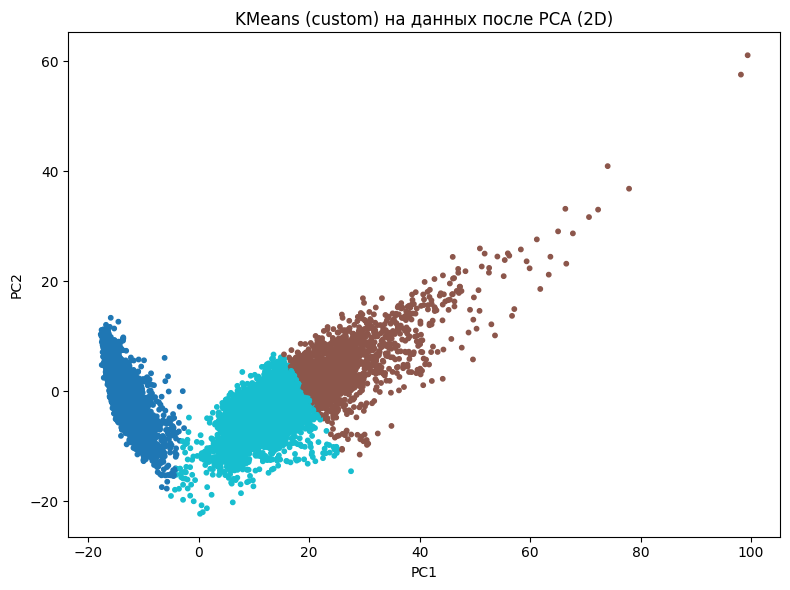

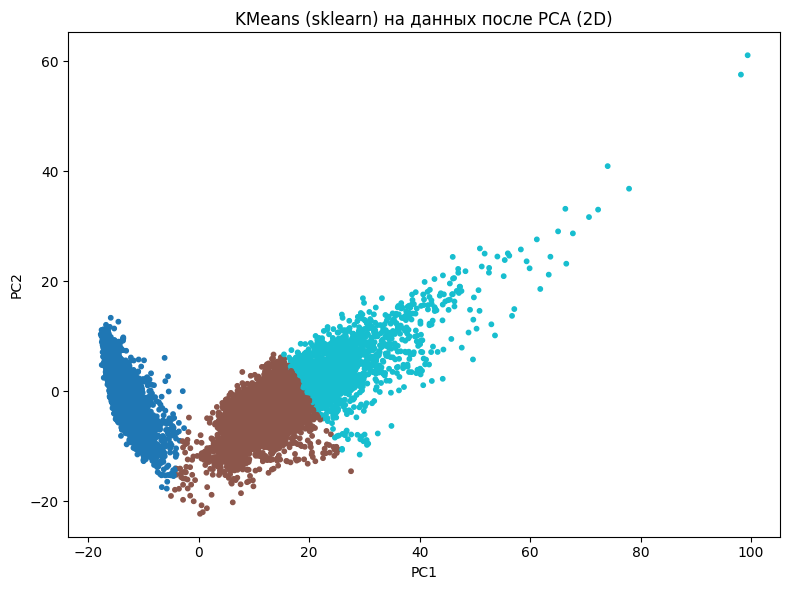

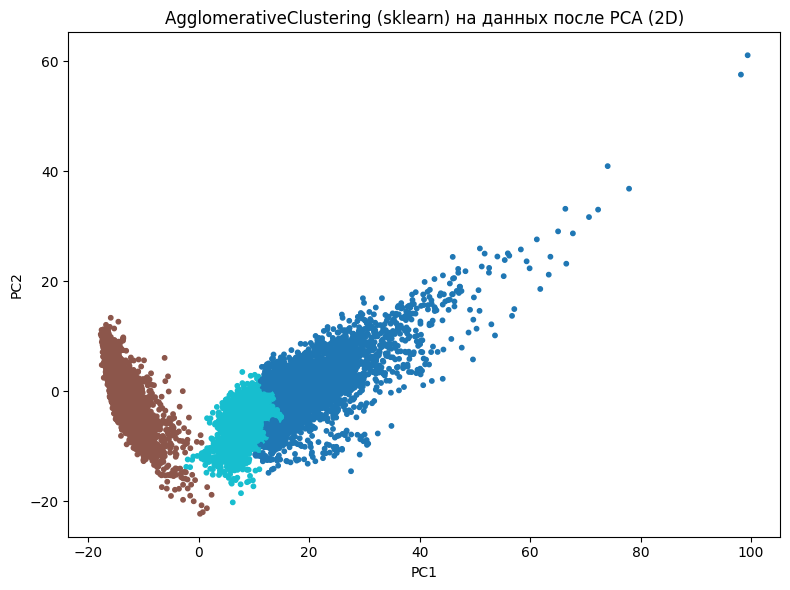

In [12]:
for model, title in gen_models():
    X_pca_2d = PCA(n_components=2, random_state=42).fit_transform(X_scaled)
    model.fit(X_pca_2d)
    labels_pca = model.labels_

    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels_pca, cmap='tab10', s=10)
    plt.title(f'{title} на данных после PCA (2D)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.tight_layout()
    plt.show()

## Визуализация после TSNE (2D)

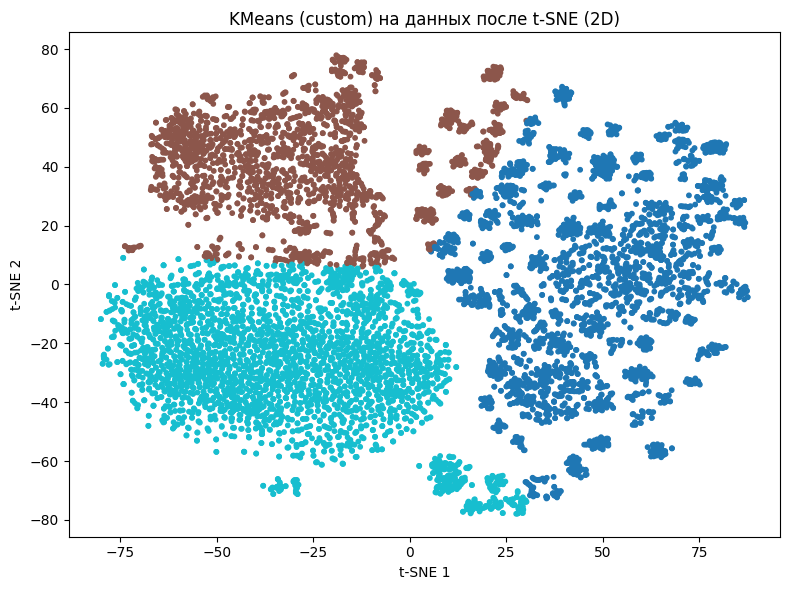

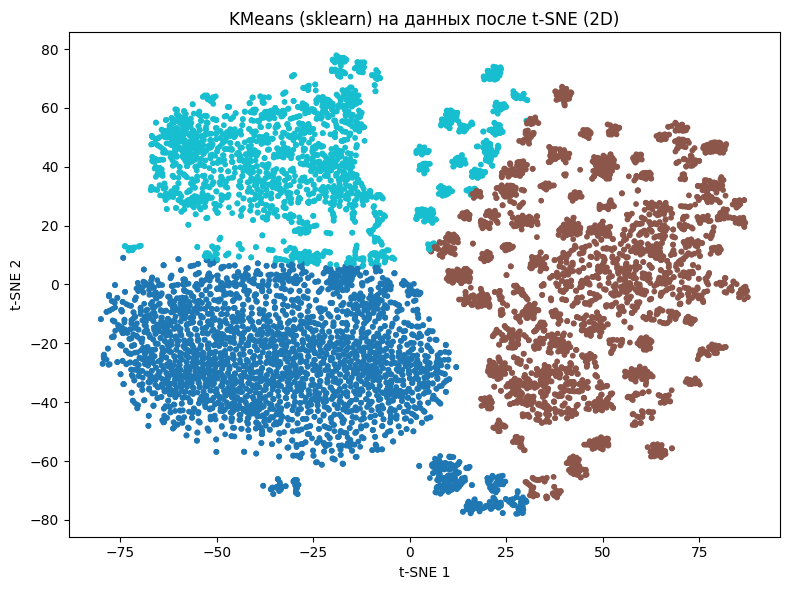

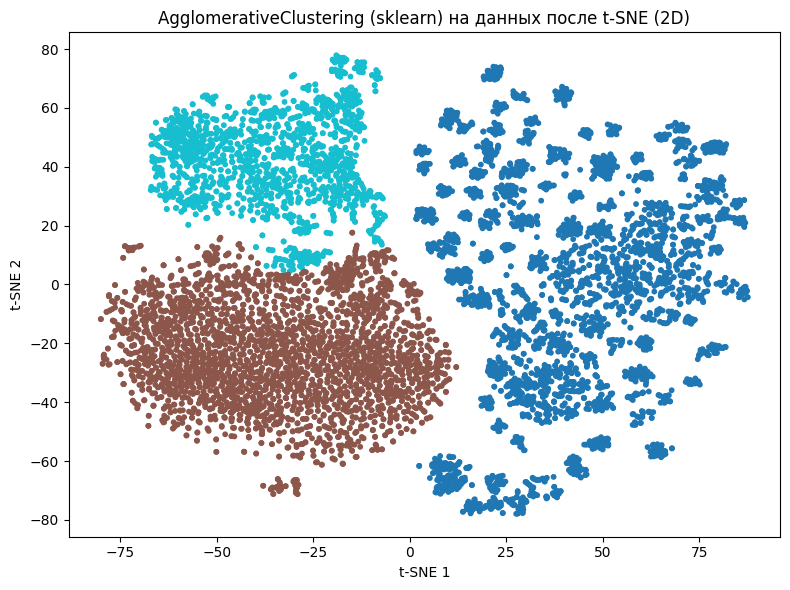

In [13]:
from sklearn.manifold import TSNE


for model, title in gen_models():
    X_tsne_2d = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)
    model.fit(X_tsne_2d)
    labels_tsne = model.labels_

    plt.figure(figsize=(8, 6))
    plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=labels_tsne, cmap='tab10', s=10)
    plt.title(f'{title} на данных после t-SNE (2D)')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.tight_layout()
    plt.show()